## Visualization

Queries to generate the data

Connect to DB server

In [2]:
import sys
# pandas to manipulate SQL answer set
import pandas as pd
import time,os
# for Posgresql and other RDBMS
from sqlalchemy import create_engine,event,schema,Table,Column, Integer, Float, String, MetaData, TIMESTAMP, Date, text, inspect
from sqlalchemy_utils import database_exists,create_database
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import CreateTable

In [3]:
# Define your PostgreSQL server connection details
database_name = 'group_7_2024'
username = 'group_7_2024'
password = 'SNMsELrjkpQC'
host = 'dbcourse.cs.aalto.fi'  # or your server address
port = '5432'  # default PostgreSQL port


# Create a connection URL
connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database_name}'

try:
    # Create an engine to test the connection
    engine = create_engine(connection_url) #.replace(f'/{database_name}', '/postgres'))  # Connect to the default 'postgres' database
    with engine.connect() as conn:
        print("Connection to PostgreSQL server successful.")
except Exception as e:
    print(f"Failed to connect to the PostgreSQL server: {e}")
    exit(1)

# Check if the database already exists
if not database_exists(connection_url):
    # Create the new database
    create_database(connection_url)
    print(f"Database '{database_name}' created successfully.")
else:
    print(f"Database '{database_name}' already exists.")

Connection to PostgreSQL server successful.
Database 'group_7_2024' already exists.


In [4]:
# Create an inspector
inspector = inspect(engine)

# Get the list of all tables
tables = inspector.get_table_names()

# Print the tables
print("Tables in the database:")
for table in tables:
    print(table)

Tables in the database:
volunteer_assignment
volunteer_assigned
volunteer
city
volunteer_range
skill
skill_assignment
interest
interest_assignment
beneficiary
request
volunteer_application
request_skill
request_location


Queries to generate the data

In [5]:
query_available = " SELECT c.name as city_name, count(distinct vr.volunteer_id) as available_count FROM city as c JOIN volunteer_range as vr ON vr.city_id = c.id GROUP BY c.name ORDER BY count(distinct vr.volunteer_id) DESC"
# joining city and request location by matching city_id, joining the volunteer range on volunteer id
# groupping the data by the name of the city, for which then it is counted how many volunteers are available
# ordering from the cities with most available volunteers

#Executing the query and reading the results into a DataFrame
available_volunteers = pd.read_sql_query(query_available, engine)

query_applied = "SELECT c.name as city_name, count(distinct vr.volunteer_id) as applied_count FROM request_location as rl JOIN city as c ON c.id = rl.city_id JOIN volunteer_application as va ON va.request_id = rl.request_id JOIN volunteer_range as vr ON vr.volunteer_id = va.volunteer_id WHERE rl.city_id  = vr.city_id GROUP BY c.name ORDER BY count(distinct vr.volunteer_id) DESC "
# joining city and request location by matching city_id, joining the volunteer application (to include the info on the applicants) on matching request id, joining the volunteer range on volunteer id
# filtering the rows where the volunteer range actually matches the request location to filter out those who applied but do not match
# groupping the data by the name of the city, for which then it is counted how many volunteers applied
# ordering from the cities with highest number of applicants with suitable skills

#Executing the query and reading the results into a DataFrame
applied_volunteers = pd.read_sql_query(query_applied, engine)

Visualization of the volunteers available by cities

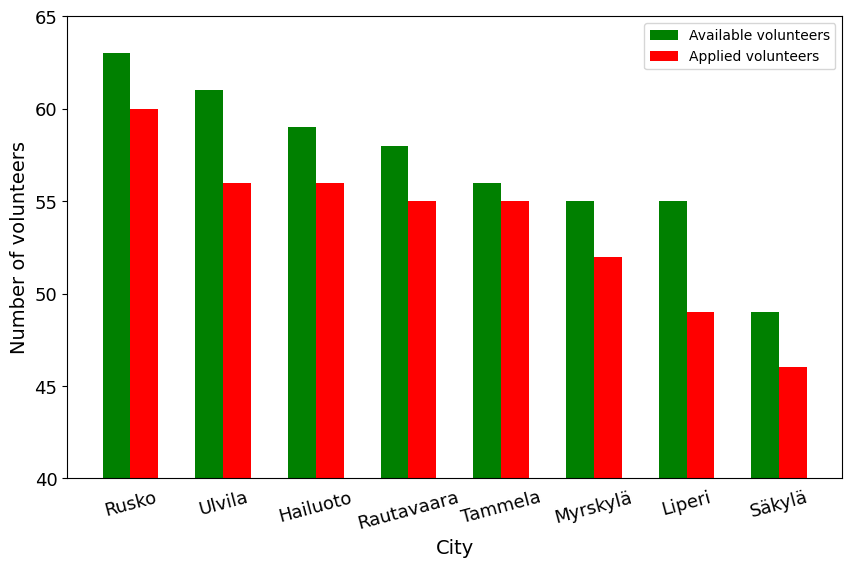

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))  # setting the figure width, height in inches
x = np.arange(len(applied_volunteers['city_name'])) 
bar_width = 0.30 # setting the width of one bar

# Plotting histograms
plt.bar(x - bar_width/2, available_volunteers['available_count'], width=bar_width, color='green', label='Available volunteers')
plt.bar(x + bar_width/2, applied_volunteers['applied_count'], width=bar_width, color='red', label='Applied volunteers')

# Add labels and legend
plt.xlabel('City', fontsize=14)
plt.ylim(40,65)
plt.ylabel('Number of volunteers', fontsize=14) #setting axis label
plt.legend() # add legend
plt.xticks(x, applied_volunteers['city_name'], rotation=15, ha='center', fontsize=13) #add labels of cities under angle in the center of the bar
plt.yticks( fontsize=13) #add labels of cities under angle
plt.gca().xaxis.set_tick_params(which='both', bottom=False, top=False)  # Remove ticks

plt.gcf().set_size_inches(10, 6) 

# Show plot
plt.show()